In [2]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sn
from datetime import datetime

Read in csv and take a look at columns

Add additional information, such as day of week and hour. 

In [6]:
df = pd.read_csv('/Users/zacharypate/Desktop/202409-capitalbikeshare-tripdata.csv')

#cast to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

#get year, month, day, hour, minute out of datetime
df['start_year'] = df['started_at'].dt.year
df['start_month'] = df['started_at'].dt.month
df['start_day'] = df['started_at'].dt.day
df['start_hour'] = df['started_at'].dt.hour
df['start_minute'] = df['started_at'].dt.minute

df['end_year'] = df['ended_at'].dt.year
df['end_month'] = df['ended_at'].dt.month
df['end_day'] = df['ended_at'].dt.day
df['end_hour'] = df['ended_at'].dt.hour
df['end_minute'] = df['ended_at'].dt.minute

df['start_weekday'] = df['started_at'].dt.day_name()
df['end_weekday'] = df['ended_at'].dt.day_name()

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_year,start_month,start_day,start_hour,start_minute,end_year,end_month,end_day,end_hour,end_minute,start_weekday,end_weekday
0,F5FCE35BD0496932,electric_bike,2024-09-01 18:24:04.188,2024-09-01 18:31:30.417,NaN,NaN,NaN,NaN,38.94,-77.03,38.950000,-77.030000,member,2024,9,1,18,24,2024,9,1,18,31,Sunday,Sunday
1,A3F84DE3B85E63E7,electric_bike,2024-09-01 01:36:03.754,2024-09-01 01:46:26.065,NaN,NaN,NaN,NaN,38.94,-77.03,38.960000,-77.030000,member,2024,9,1,1,36,2024,9,1,1,46,Sunday,Sunday
2,2D0DA226FD0505B9,electric_bike,2024-09-01 09:36:53.204,2024-09-01 09:50:31.764,NaN,NaN,NaN,NaN,38.95,-77.01,38.950000,-77.010000,member,2024,9,1,9,36,2024,9,1,9,50,Sunday,Sunday
3,36804EB047EF3C7D,electric_bike,2024-09-01 15:23:19.328,2024-09-01 15:39:26.971,NaN,NaN,Wisconsin Ave & Newark St NW,31302.0,38.91,-77.06,38.934881,-77.072755,member,2024,9,1,15,23,2024,9,1,15,39,Sunday,Sunday
4,4F0A4712B56CD5A4,electric_bike,2024-09-01 16:13:27.034,2024-09-01 16:22:37.897,NaN,NaN,NaN,NaN,38.90,-77.03,38.910000,-77.010000,member,2024,9,1,16,13,2024,9,1,16,22,Sunday,Sunday


In [74]:
len(df)

720309

Lets get some general statistics about the stations, lat longs, and member types

In [30]:
df[['start_station_name', 'ride_id']].groupby(['start_station_name']).count().reset_index().sort_values(by=['ride_id'], ascending=False)

,start_station_name,ride_id
306,Columbus Circle / Union Station,5467
550,New Hampshire Ave & T St NW,5075
66,15th & P St NW,4546
196,5th & K St NW,4482
116,1st & M St NE,4439
...,...,...
623,Ridge Heights Rd & Seahawks Dr,4
753,White Oak Transit Center,4
454,Kingsbridge Dr & Draper Dr,3
472,Livingston Rd & 3rd St SE,2


In [31]:
df[['end_station_name', 'ride_id']].groupby(['end_station_name']).count().reset_index().sort_values(by=['ride_id'], ascending=False)

,end_station_name,ride_id
306,Columbus Circle / Union Station,5439
551,New Hampshire Ave & T St NW,4998
66,15th & P St NW,4557
196,5th & K St NW,4556
116,1st & M St NE,4460
...,...,...
455,Kingsbridge Dr & Draper Dr,4
473,Livingston Rd & 3rd St SE,3
560,Norfolk & Rugby Ave,2
567,North Shore & Cameron Crescent Dr/Crescent Apa...,2


Weekdays below are not normalized. IE: There could be more Sundays in the month than other days

<AxesSubplot:xlabel='start_weekday'>

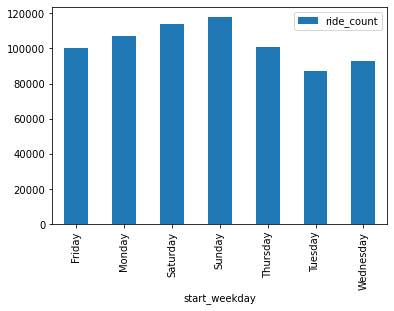

In [38]:
weekday_count = df[['start_weekday','ride_id']].groupby(['start_weekday']).count().reset_index().rename(columns={'ride_id':'ride_count'})
weekday_count.plot.bar(x = 'start_weekday', y = 'ride_count', )

<AxesSubplot:xlabel='member_casual'>

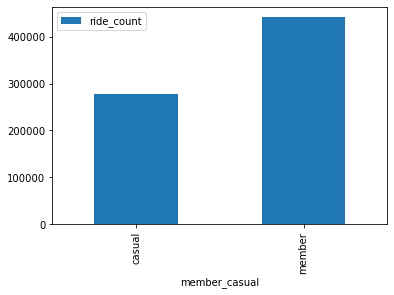

In [40]:
member_casual = df[['member_casual','ride_id']].groupby(['member_casual']).count().reset_index().rename(columns={'ride_id':'ride_count'})
member_casual.plot.bar(x = 'member_casual', y = 'ride_count', )

<AxesSubplot:xlabel='start_hour'>

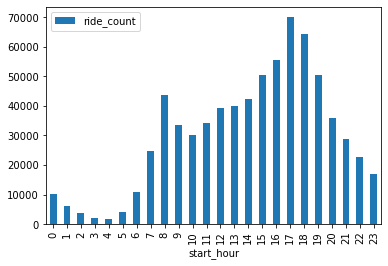

In [42]:
hour_count = df[['start_hour','ride_id']].groupby(['start_hour']).count().reset_index().rename(columns={'ride_id':'ride_count'})
hour_count.plot.bar(x = 'start_hour', y = 'ride_count', )

<AxesSubplot:xlabel='start_hour', ylabel='start_weekday'>

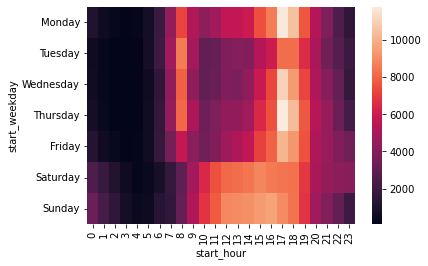

In [54]:
heat_map_hour_day = df[['start_hour','start_weekday', 'ride_id']].groupby(['start_hour','start_weekday',]).count().reset_index().rename(columns={'ride_id':'ride_count'})
heat_map_hour_day['start_weekday'] = pd.Categorical(heat_map_hour_day['start_weekday'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
heat_map_hour_day = heat_map_hour_day.pivot(index = 'start_weekday', columns = 'start_hour', values = 'ride_count')
sn.heatmap(heat_map_hour_day)

It's worthwhile to join weather onto the dataset so we can see if rain effected the data (fewer riders ride when it rains)

In [68]:
def convert_meteostat_conversion(meteostat_df):
    meteostat_df['tavg'] = (meteostat_df['tavg'] * (9/5)) + 32
    meteostat_df['tmin'] = (meteostat_df['tmin'] * (9/5)) + 32
    meteostat_df['tmax'] = (meteostat_df['tmax'] * (9/5)) + 32

    meteostat_df['wspd'] = meteostat_df['wspd'] * .621371

    return meteostat_df

def bad_weather_day(meteostat_df):
    if (meteostat_df['tavg'] >= 95) or (meteostat_df['tavg'] <= 50) or (meteostat_df['wspd'] > 40) or (meteostat_df['prcp'] > 3) or (meteostat_df['snow'] > 0):
        return(1)
    else:
        return(0)

weather_df = convert_meteostat_conversion(pd.read_csv('weather_data.csv'))[['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd']]
weather_df['bad_weather'] = weather_df.apply(bad_weather_day, axis = 1)

weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['month'] = weather_df['date'].dt.month
weather_df['day'] = weather_df['date'].dt.day

weather_df

,date,tavg,tmin,tmax,prcp,snow,wspd,bad_weather,month,day
0,2024-09-01,76.64,73.04,86.00,0.3,0.0,6.275847,0,9,1
1,2024-09-02,76.46,66.92,80.96,0.0,0.0,10.749718,0,9,2
2,2024-09-03,69.26,60.08,77.00,0.0,0.0,10.066210,0,9,3
3,2024-09-04,68.72,57.92,78.08,0.0,0.0,6.710807,0,9,4
4,2024-09-05,70.16,60.98,80.06,0.0,NaN,6.959355,0,9,5
5,2024-09-06,71.78,64.94,78.98,0.0,0.0,4.225323,0,9,6
6,2024-09-07,69.98,62.06,77.00,0.3,0.0,8.264234,0,9,7
7,2024-09-08,65.84,57.02,75.92,0.0,0.0,8.264234,0,9,8
8,2024-09-09,67.46,55.94,80.06,0.0,0.0,3.790363,0,9,9
9,2024-09-10,71.60,59.00,87.08,0.0,0.0,5.592339,0,9,10


In [73]:
df1 = df.merge(weather_df, how = 'left', left_on=['start_day', 'start_month'], right_on=['day', 'month'])
df1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_year,start_month,start_day,start_hour,start_minute,end_year,end_month,end_day,end_hour,end_minute,start_weekday,end_weekday,date,tavg,tmin,tmax,prcp,snow,wspd,bad_weather,month,day
0,F5FCE35BD0496932,electric_bike,2024-09-01 18:24:04.188,2024-09-01 18:31:30.417,NaN,NaN,NaN,NaN,38.94,-77.03,38.950000,-77.030000,member,2024,9,1,18,24,2024,9,1,18,31,Sunday,Sunday,2024-09-01,76.64,73.04,86.00,0.3,0.0,6.275847,0.0,9.0,1.0
1,A3F84DE3B85E63E7,electric_bike,2024-09-01 01:36:03.754,2024-09-01 01:46:26.065,NaN,NaN,NaN,NaN,38.94,-77.03,38.960000,-77.030000,member,2024,9,1,1,36,2024,9,1,1,46,Sunday,Sunday,2024-09-01,76.64,73.04,86.00,0.3,0.0,6.275847,0.0,9.0,1.0
2,2D0DA226FD0505B9,electric_bike,2024-09-01 09:36:53.204,2024-09-01 09:50:31.764,NaN,NaN,NaN,NaN,38.95,-77.01,38.950000,-77.010000,member,2024,9,1,9,36,2024,9,1,9,50,Sunday,Sunday,2024-09-01,76.64,73.04,86.00,0.3,0.0,6.275847,0.0,9.0,1.0
3,36804EB047EF3C7D,electric_bike,2024-09-01 15:23:19.328,2024-09-01 15:39:26.971,NaN,NaN,Wisconsin Ave & Newark St NW,31302.0,38.91,-77.06,38.934881,-77.072755,member,2024,9,1,15,23,2024,9,1,15,39,Sunday,Sunday,2024-09-01,76.64,73.04,86.00,0.3,0.0,6.275847,0.0,9.0,1.0
4,4F0A4712B56CD5A4,electric_bike,2024-09-01 16:13:27.034,2024-09-01 16:22:37.897,NaN,NaN,NaN,NaN,38.90,-77.03,38.910000,-77.010000,member,2024,9,1,16,13,2024,9,1,16,22,Sunday,Sunday,2024-09-01,76.64,73.04,86.00,0.3,0.0,6.275847,0.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720304,F31B396C09CDD810,electric_bike,2024-09-20 17:46:58.160,2024-09-20 17:49:02.462,NaN,NaN,NaN,NaN,38.92,-77.04,38.920000,-77.040000,member,2024,9,20,17,46,2024,9,20,17,49,Friday,Friday,2024-09-20,75.56,64.94,86.00,0.0,0.0,5.840887,0.0,9.0,20.0
720305,9C23F7E54E1CF3E1,electric_bike,2024-09-05 08:17:10.955,2024-09-05 08:36:41.495,NaN,NaN,NaN,NaN,38.88,-77.01,38.900000,-77.050000,member,2024,9,5,8,17,2024,9,5,8,36,Thursday,Thursday,2024-09-05,70.16,60.98,80.06,0.0,NaN,6.959355,0.0,9.0,5.0
720306,F5E8A00116A10F7E,electric_bike,2024-09-07 12:04:43.149,2024-09-07 12:28:46.817,NaN,NaN,NaN,NaN,38.86,-77.11,38.860000,-77.050000,member,2024,9,7,12,4,2024,9,7,12,28,Saturday,Saturday,2024-09-07,69.98,62.06,77.00,0.3,0.0,8.264234,0.0,9.0,7.0
720307,ADD3FAAFC4857150,electric_bike,2024-09-07 09:35:47.209,2024-09-07 10:00:11.606,NaN,NaN,NaN,NaN,38.86,-77.06,38.860000,-77.110000,member,2024,9,7,9,35,2024,9,7,10,0,Saturday,Saturday,2024-09-07,69.98,62.06,77.00,0.3,0.0,8.264234,0.0,9.0,7.0
